# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from pprint import pprint


# Import API key
api_key = "cce0941ba8b77a8c38526ce88598481d"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set up lists to hold reponse infomation
max_temps = []
humidities =[]
clouds = []
wind = []
lat = []
lng = []
country = []
date = []
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Print first sentence to show the beginning of data retrieval
print("Beginning Data Retrieval")
print("-"*25)
# Set the initial city number as 1
count = 1
# Loop throught the list of cities and append data to lists above
for city in cities:
# Build query URL
    query_url = url + "appid=" + api_key  +"&units=" + units +"&q=" + city 
# Get weather data from json response
    weather_json = requests.get(query_url).json()
# Store the data in the lists if they are available
    try:
        
        max_temps.append(weather_json["main"]["temp_max"])
        humidities.append(weather_json["main"]["humidity"])
        clouds.append(weather_json["clouds"]["all"])
        wind.append(weather_json["wind"]["speed"])
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        print("Processing record of city number " + str(count) + "|" + city)
        print(query_url)
        print("-"*25)
# Print out the "City not found. Skipping" if the data are not available
    except:
        print("City not found. Skipping...")
        print("-"*25)
# Store and unavailable data as NAN 
        max_temps.append(np.nan)
        humidities.append(np.nan)
        clouds.append(np.nan)
        wind.append(np.nan)
        lat.append(np.nan)
        lng.append(np.nan)
        country.append(np.nan)
        date.append(np.nan)
# Add 1 to the city number after each loop      
    count += 1
# Print the finish sentence
print("Data Retrieval Complete")
print("-"*25)

Beginning Data Retrieval
-------------------------
Processing record of city number 1|mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=cce0941ba8b77a8c38526ce88598481d&units=imperial&q=mahebourg
-------------------------
Processing record of city number 2|caravelas
http://api.openweathermap.org/data/2.5/weather?appid=cce0941ba8b77a8c38526ce88598481d&units=imperial&q=caravelas
-------------------------
Processing record of city number 3|ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=cce0941ba8b77a8c38526ce88598481d&units=imperial&q=ushuaia
-------------------------
Processing record of city number 4|kapaa
http://api.openweathermap.org/data/2.5/weather?appid=cce0941ba8b77a8c38526ce88598481d&units=imperial&q=kapaa
-------------------------
Processing record of city number 5|dikson
http://api.openweathermap.org/data/2.5/weather?appid=cce0941ba8b77a8c38526ce88598481d&units=imperial&q=dikson
-------------------------
Processing record of city number 6|pevek
http:/

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dataframe from the lists above
weather_df = pd.DataFrame({"City": cities,
                           "Cloudiness": clouds,
                           "Country": country,
                           "Date": date,
                           "Humidity": humidities,
                           "Lat": lat,
                           "Lng": lng,
                           "Max Temp": max_temps,
                           "Wind Speed": wind,
                          })
# Drop the city with the nan data
weather_df = weather_df.dropna(how = 'any')
# Export the city data into a .csv file
weather_df.to_csv("output_data/cities.csv", index=False, header=True)
# 
weather_df.count()

City          545
Cloudiness    545
Country       545
Date          545
Humidity      545
Lat           545
Lng           545
Max Temp      545
Wind Speed    545
dtype: int64

In [13]:
# display the city dataframe
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mahebourg,40.0,MU,1.547312e+09,74.0,-20.41,57.70,82.40,11.41
1,caravelas,0.0,BR,1.547314e+09,100.0,-17.73,-39.27,80.94,11.10
2,ushuaia,75.0,AR,1.547312e+09,87.0,-54.81,-68.31,44.60,34.45
3,kapaa,1.0,US,1.547312e+09,87.0,22.08,-159.32,66.92,9.17
4,dikson,48.0,RU,1.547314e+09,100.0,73.51,80.55,-17.03,31.79


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

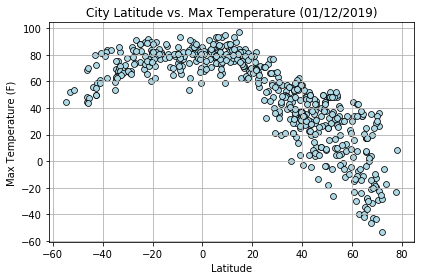

In [6]:

# Plot the lat vs the max temp
plt.scatter(weather_df["Lat"], weather_df["Max Temp"],
            linewidths = 0.75, edgecolors = "black", color = "lightblue", s=35)


# This extracts the date and returns it in the local time zone
date = time.strftime("%m/%d/%Y", time.gmtime())
# Add labeling
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Modify ticks

plt.grid(True) 
plt.tight_layout()
plt.savefig("output_data/temp.png")


plt.show()

#### Latitude vs. Humidity Plot

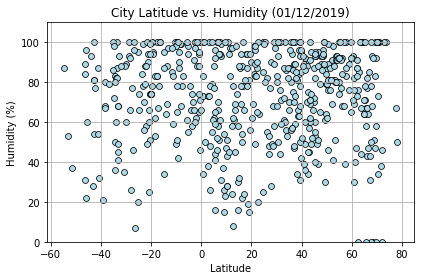

In [10]:
# Plot the lat vs the humidity
plt.scatter(weather_df["Lat"], weather_df["Humidity"],
            linewidths = 0.75, edgecolors = "black", color = "lightblue", s=35)

# Add labeling
# This extracts the date and returns it in the local time zone

date = time.strftime("%m/%d/%Y", time.gmtime())
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Modify ticks
plt.ylim(0,110)
plt.grid(True) 
plt.tight_layout()
plt.savefig("output_data/Humidity.png")


plt.show()

#### Latitude vs. Cloudiness Plot

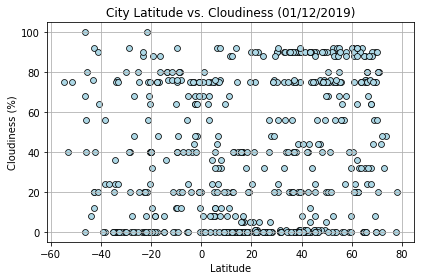

In [11]:
# Plot the lat vs the cloudiness
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"],
            linewidths = 0.75, edgecolors = "black", color = "lightblue", s=35)

# Add labeling
# This extracts the date and returns it in the local time zone

date = time.strftime("%m/%d/%Y", time.gmtime())
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Modify ticks

plt.grid(True) 
plt.tight_layout()
plt.savefig("output_data/Cloudiness.png")


plt.show()

#### Latitude vs. Wind Speed Plot

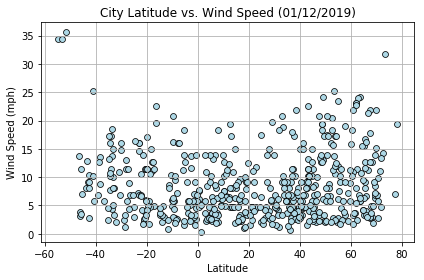

In [12]:
# Plot the lat vs the wind speed
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"],
            linewidths = 0.75, edgecolors = "black", color = "lightblue", s=35)

# Add labeling
# This extracts the date and returns it in the local time zone

date = time.strftime("%m/%d/%Y", time.gmtime())
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Modify ticks

plt.grid(True) 
plt.tight_layout()
plt.savefig("output_data/Wind Speed.png")


plt.show()